## Segmentación de clientes

## Librerías

In [160]:
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para manipulación y análisis de datos
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from toolbox_DS import *

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)


## Funciones

In [192]:
def crear_grafico_radar(stats, etiquetas, titulo):
    """
    Crea y muestra un gráfico de radar con las estadísticas y etiquetas proporcionadas.
    
    Parámetros:
    - stats: Lista de estadísticas para cada variable.
    - etiquetas: Lista de etiquetas para cada eje del gráfico de radar.
    """
    # Número de variables que estamos graficando.
    num_vars = len(stats)
    
    # Dividir el círculo y calcular los ángulos necesarios para representar cada eje.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # El gráfico es circular, por lo que necesitamos cerrar el círculo y los ángulos deben completarse.
    stats += stats[:1]
    angles += angles[:1]
    
    # Iniciar el gráfico de radar.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Dibujar una línea alrededor del gráfico de radar.
    ax.fill(angles, stats, color='red', alpha=0.25)
    
    # Dibujar las líneas de los ejes.
    ax.plot(angles, stats, color='red', linewidth=2)

    ax.set_title(titulo)
    
    # Establecer las etiquetas para los ejes.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(etiquetas)
    
    # Mostrar el gráfico.
    plt.show()

## Carga de datos (train_set)

In [161]:
train_set = pd.read_csv('./data/train_set.csv')
train_set

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,income_missing,age,customes_seniority,Household_members,Total_amount,Total_purchase,Median_amount_purchase,Total_cmp,Total_%_cmp
0,5675,1960,PhD,Divorced,50611.0,0,1,2012-10-04,98,459,...,0,0,55,3,2.0,493,22,22.409091,1,0.2
1,5543,1966,Graduation,Together,57811.0,0,1,2013-06-24,49,545,...,0,0,49,2,3.0,802,25,32.080000,1,0.2
2,3011,1965,Graduation,Married,69139.0,0,1,2014-01-27,23,86,...,0,0,50,1,3.0,227,11,20.636364,0,0.0
3,535,1987,Graduation,Divorced,81361.0,0,0,2014-02-25,18,163,...,0,0,28,1,1.0,778,27,28.814815,0,0.0
4,10755,1976,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,...,0,0,39,2,3.0,81,9,9.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,5320,1973,Master,Divorced,44051.0,1,1,2013-01-29,20,79,...,1,0,42,2,3.0,171,12,14.250000,0,0.0
1786,2894,1985,Graduation,Single,72903.0,0,0,2013-10-29,74,1067,...,1,0,30,2,1.0,2013,21,95.857143,3,0.6
1787,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,...,1,0,45,2,1.0,81,5,16.200000,1,0.2
1788,6905,1994,Graduation,Together,80685.0,0,0,2012-08-22,55,241,...,0,0,21,3,2.0,1004,21,47.809524,0,0.0


In [162]:
train_set.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'income_missing', 'age',
       'customes_seniority', 'Household_members', 'Total_amount',
       'Total_purchase', 'Median_amount_purchase', 'Total_cmp', 'Total_%_cmp'],
      dtype='object')

In [163]:
# Cambio el índice
train_set.set_index('ID', inplace=True)

# Cambio tipo a datetime
train_set['Dt_Customer'] = pd.to_datetime(train_set['Dt_Customer'])

# Cambiar tipo a categóricas
cols_to_category = ['Education', 'Marital_Status']
train_set[cols_to_category] = train_set[cols_to_category].astype('category')

# Elimino columna 'income_missing'
train_set = train_set.drop(columns=['income_missing', 'Year_Birth','Total_%_cmp','Dt_Customer','Median_amount_purchase'])

# Elimino el outlier de Income
train_set = train_set.loc[train_set['Income'] !=666666]

## Tratamiento de variables

Selección de features por dtype

In [164]:
features_num = train_set.select_dtypes(['int','float']).columns
features_cat = train_set.select_dtypes(['object', 'category']).columns
print('features_num', features_num)
print('features_cat', features_cat)

features_num Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'customes_seniority',
       'Household_members', 'Total_amount', 'Total_purchase', 'Total_cmp'],
      dtype='object')
features_cat Index(['Education', 'Marital_Status'], dtype='object')


Preparación de las transformaciones

In [165]:
# Definimos el OrdinalEncoder con el mapeo de 'education_ode'
ordinal_encoder = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']])

categorical_features_onehot = ['Marital_Status']
categorical_features_ordinal = ['Education']
numerical_features = features_num

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat_onehot', OneHotEncoder(), categorical_features_onehot),
        ('cat_ordinal', Pipeline([
            ('ordinal', ordinal_encoder),
            ('scaler', MinMaxScaler())
        ]), categorical_features_ordinal)
    ]
)

Primera valoración del KMeans con un rango entre 3 y 7 clúster

In [166]:
soluciones = list(range(2, 7))

codo = []
silueta = []
calins = []
davies = []

for solucion in soluciones:
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(random_state=42, n_clusters=solucion, n_init=10))
    ])
    
   
    pipeline.fit(train_set)
    
    # Obtenemos los datos transformados del paso 'preprocessor'
    X_transformed = pipeline.named_steps['preprocessor'].transform(train_set)
    
    # Obtenemos las etiquetas del cluster del paso 'kmeans'
    labels = pipeline.named_steps['kmeans'].labels_
    
    # Recoger las métricas usando los datos transformados
    codo.append(pipeline.named_steps['kmeans'].inertia_)
    silueta.append(silhouette_score(X_transformed, labels))
    calins.append(calinski_harabasz_score(X_transformed, labels))
    davies.append(davies_bouldin_score(X_transformed, labels))

Resultados a dataframe y visualización gráfica

In [167]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
2,2.636322e+11,0.606243,3936.333294,0.523995
3,1.516855e+11,0.543002,4077.848251,0.554045
4,1.019887e+11,0.528716,4330.924292,0.567650
5,6.659411e+10,0.536339,5208.929714,0.461499
6,4.426192e+10,0.535167,6445.987266,0.461466


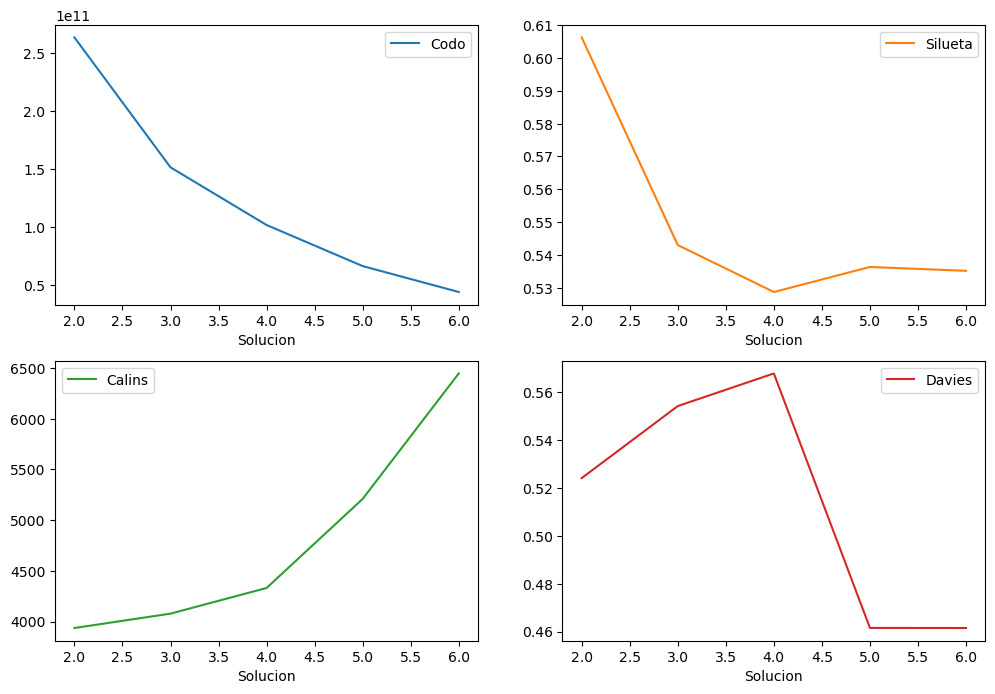

In [168]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

Parece que estaría entre 4 y 5 sería el mejor número para los clúster.

In [169]:
k =3
# Instanciar el pipeline con el preprocesador y KMeans
pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('kmeans', KMeans(random_state=42, n_clusters=k, n_init=10))
   ])
    
# Entrenar el pipeline
pipeline.fit(train_set)
    
# Obtenemos los datos transformados del paso 'preprocessor'
X_transformed = pipeline.named_steps['preprocessor'].transform(train_set)
    
# Obtenemos las etiquetas del cluster del paso 'kmeans'
labels = pipeline.named_steps['kmeans'].labels_

# Si deseas añadir las etiquetas de los clusters al DataFrame original
train_set['Cluster'] = labels

In [170]:
train_set['Cluster'].value_counts()

Cluster
1    655
2    634
0    500
Name: count, dtype: int64

Elijo 4 dado que con 5 se me queda un último clúster muy pequeño (solo 7 personas)

## Análisis clúster con respecto a las variables

### Análisis con variables numéricas

Análisis de Income vs Cluster
****************************************


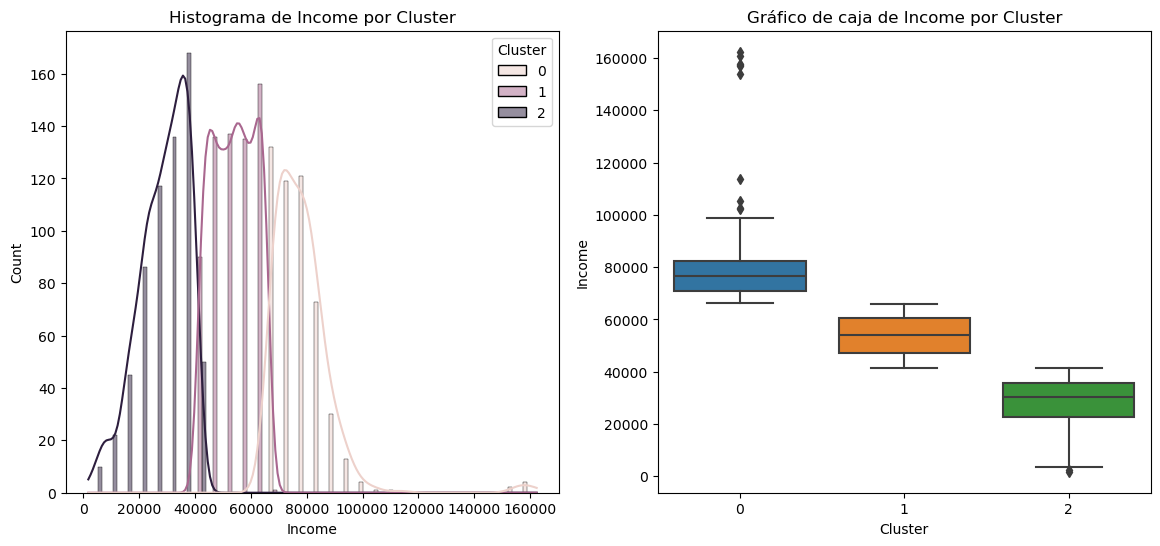

Estadísticos de resumen para Income por Cluster:
         count      mean       std      min       25%      50%       75%  \
Cluster                                                                    
0        500.0  78260.53  11692.44  66294.0  71004.25  76635.5  82327.75   
1        655.0  53927.94   7366.75  41437.0  47068.00  54178.0  60478.00   
2        634.0  28674.61   8670.72   1730.0  22804.00  30279.0  35860.00   

              max  
Cluster            
0        162397.0  
1         66000.0  
2         41275.0  

ANOVA para Income:
Estadístico F: 4084.84
p-valor: 0.000
La variable Income está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Kidhome vs Cluster
****************************************


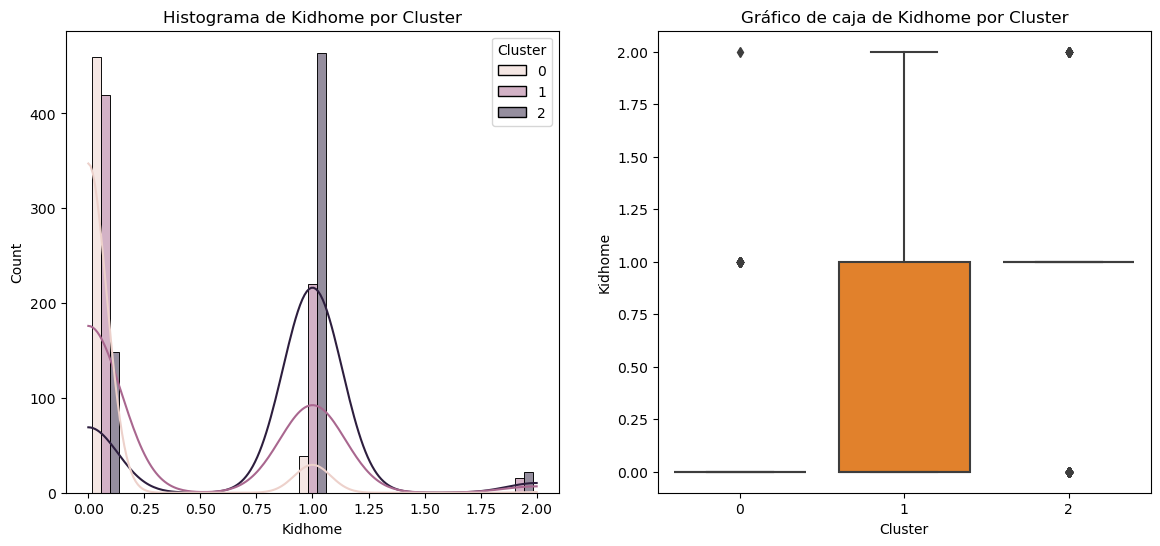

Estadísticos de resumen para Kidhome por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.08  0.28  0.0  0.0  0.0  0.0  2.0
1        655.0  0.38  0.53  0.0  0.0  0.0  1.0  2.0
2        634.0  0.80  0.48  0.0  1.0  1.0  1.0  2.0

ANOVA para Kidhome:
Estadístico F: 357.35
p-valor: 0.000
La variable Kidhome está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Teenhome vs Cluster
****************************************


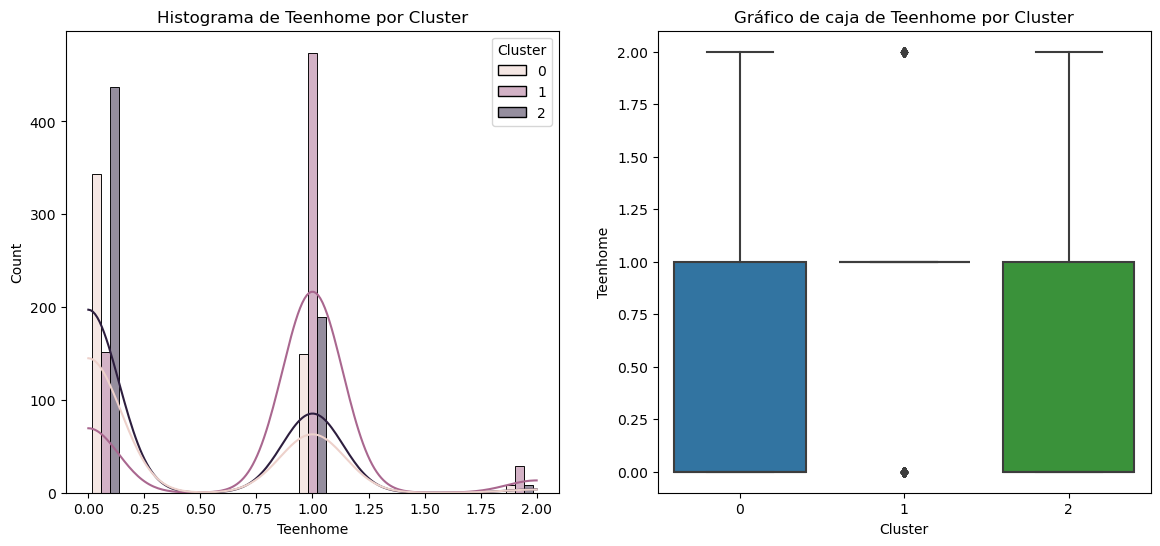

Estadísticos de resumen para Teenhome por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.33  0.50  0.0  0.0  0.0  1.0  2.0
1        655.0  0.81  0.49  0.0  1.0  1.0  1.0  2.0
2        634.0  0.32  0.49  0.0  0.0  0.0  1.0  2.0

ANOVA para Teenhome:
Estadístico F: 199.38
p-valor: 0.000
La variable Teenhome está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Recency vs Cluster
****************************************


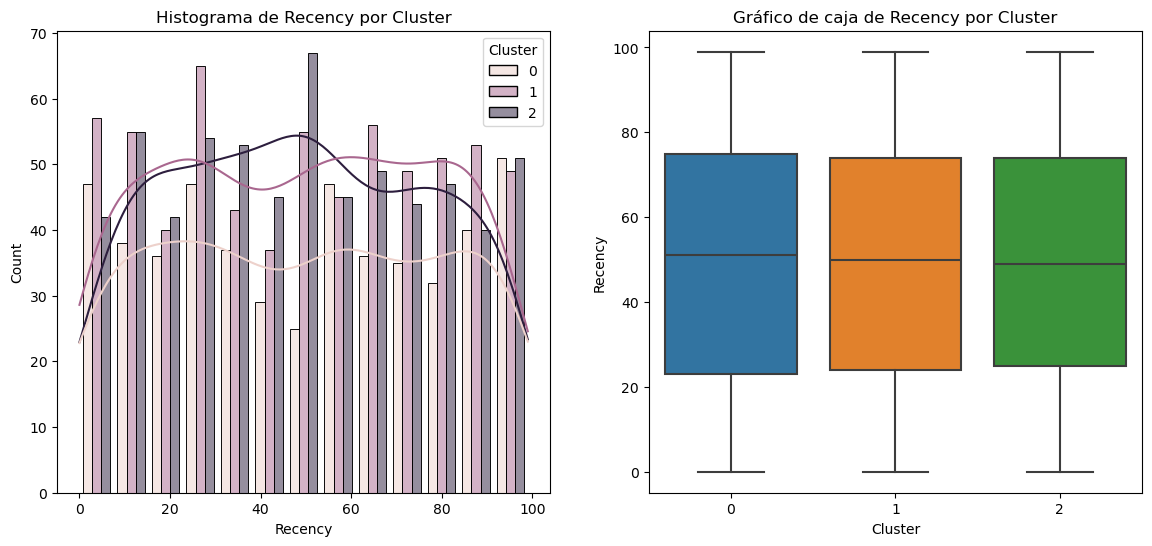

Estadísticos de resumen para Recency por Cluster:
         count   mean    std  min   25%   50%   75%   max
Cluster                                                  
0        500.0  49.32  30.07  0.0  23.0  51.0  75.0  99.0
1        655.0  48.99  29.10  0.0  24.0  50.0  74.0  99.0
2        634.0  48.93  28.05  0.0  25.0  49.0  74.0  99.0

ANOVA para Recency:
Estadístico F: 0.03
p-valor: 0.973
La variable Recency no está significativamente asociada con Cluster (p >= 0.05).

Análisis de MntWines vs Cluster
****************************************


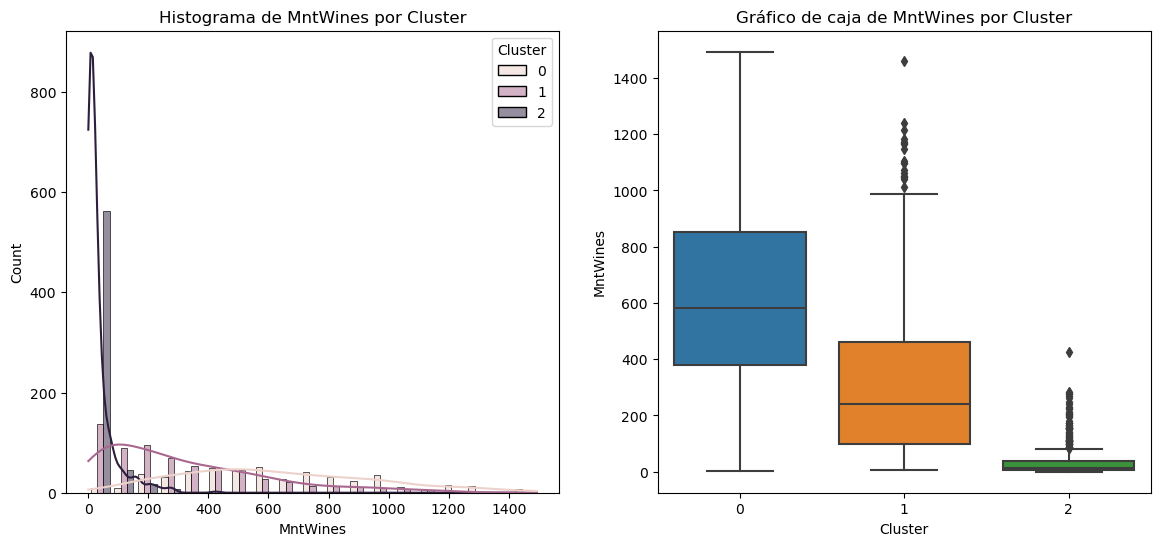

Estadísticos de resumen para MntWines por Cluster:
         count    mean     std  min     25%    50%     75%     max
Cluster                                                           
0        500.0  626.94  328.48  1.0  379.25  583.5  853.00  1493.0
1        655.0  317.21  272.83  5.0   99.00  240.0  462.00  1459.0
2        634.0   33.56   50.46  0.0    6.00   15.0   36.75   424.0

ANOVA para MntWines:
Estadístico F: 845.79
p-valor: 0.000
La variable MntWines está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFruits vs Cluster
****************************************


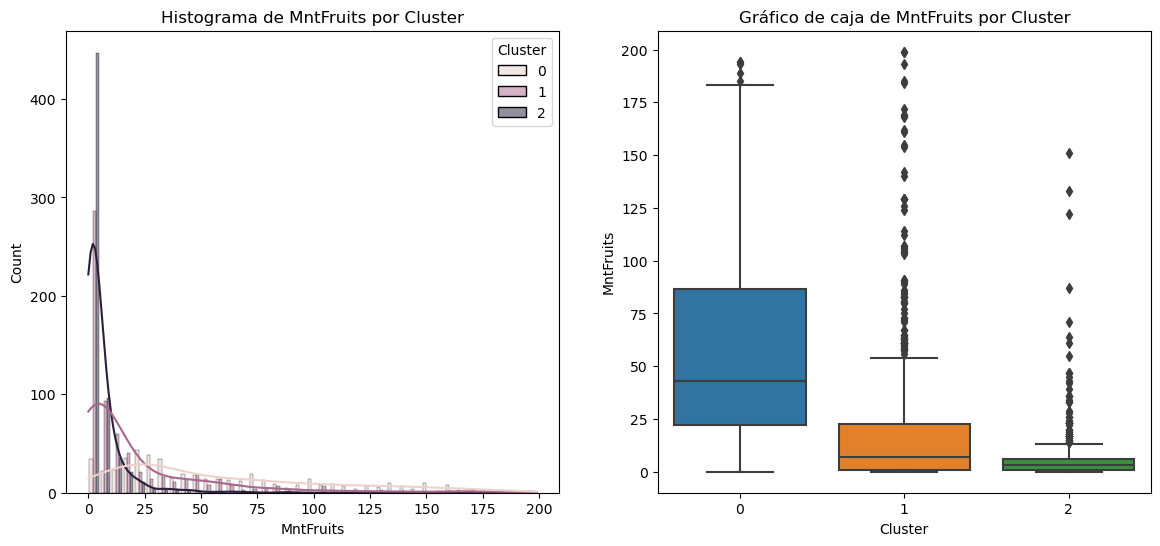

Estadísticos de resumen para MntFruits por Cluster:
         count   mean    std  min   25%   50%    75%    max
Cluster                                                    
0        500.0  58.69  48.36  0.0  22.0  43.0  86.75  194.0
1        655.0  20.84  33.78  0.0   1.0   7.0  22.50  199.0
2        634.0   6.12  12.74  0.0   1.0   3.0   6.00  151.0

ANOVA para MntFruits:
Estadístico F: 355.34
p-valor: 0.000
La variable MntFruits está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntMeatProducts vs Cluster
****************************************


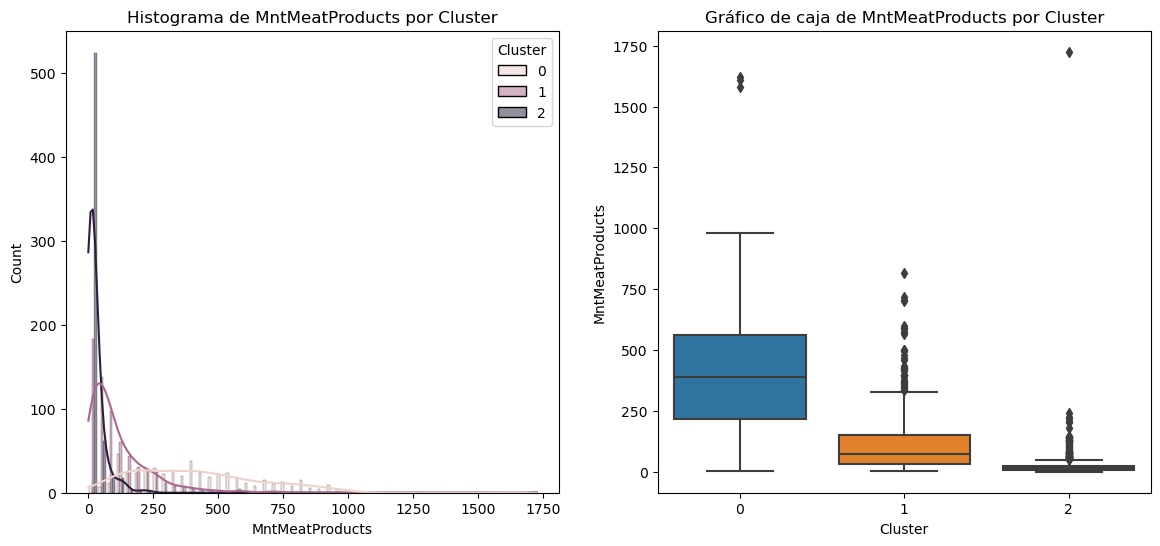

Estadísticos de resumen para MntMeatProducts por Cluster:
         count    mean     std  min     25%    50%    75%     max
Cluster                                                          
0        500.0  415.12  252.77  1.0  215.00  389.0  562.0  1622.0
1        655.0  110.90  117.29  1.0   30.00   71.0  151.5   816.0
2        634.0   27.26   74.96  0.0    7.25   14.0   25.0  1725.0

ANOVA para MntMeatProducts:
Estadístico F: 908.78
p-valor: 0.000
La variable MntMeatProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFishProducts vs Cluster
****************************************


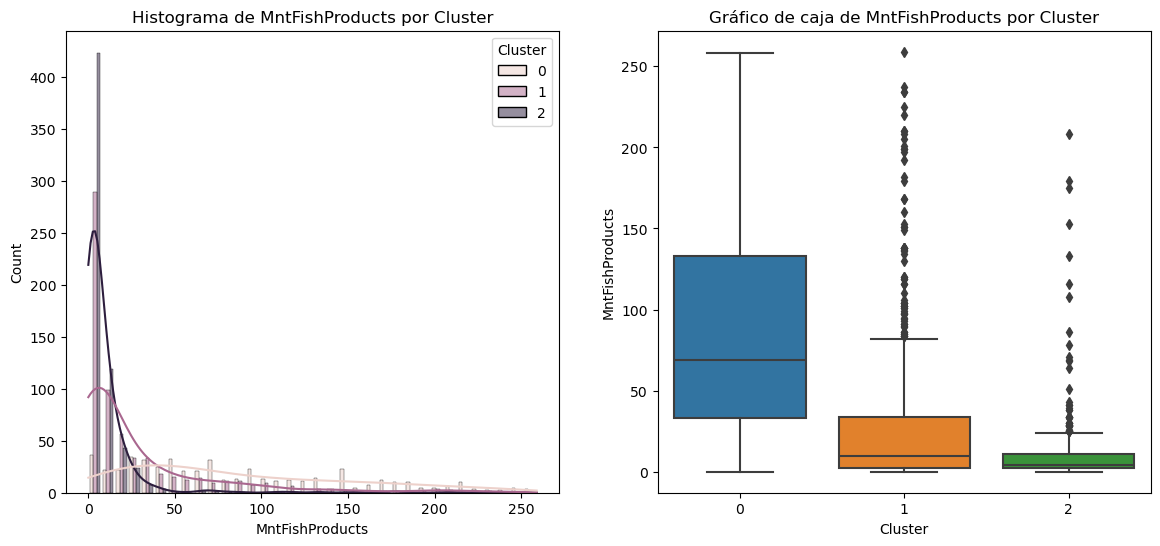

Estadísticos de resumen para MntFishProducts por Cluster:
         count   mean    std  min   25%   50%    75%    max
Cluster                                                    
0        500.0  86.50  66.13  0.0  33.0  69.0  133.0  258.0
1        655.0  28.21  44.30  0.0   2.0  10.0   34.0  259.0
2        634.0   9.07  18.67  0.0   2.0   4.0   11.0  208.0

ANOVA para MntFishProducts:
Estadístico F: 428.59
p-valor: 0.000
La variable MntFishProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntSweetProducts vs Cluster
****************************************


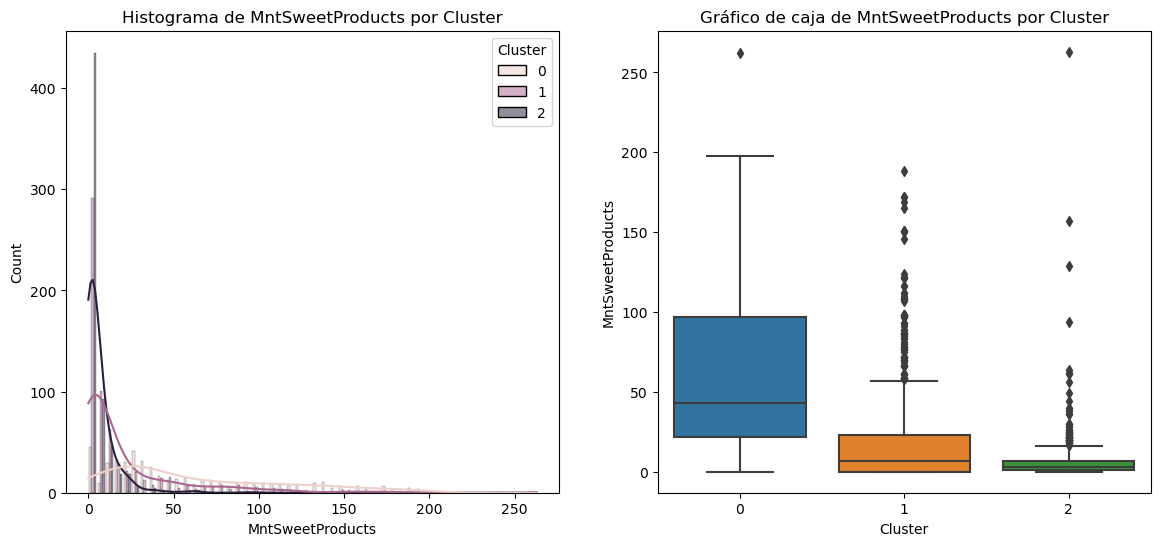

Estadísticos de resumen para MntSweetProducts por Cluster:
         count   mean    std  min   25%   50%   75%    max
Cluster                                                   
0        500.0  62.26  52.37  0.0  22.0  43.0  97.0  262.0
1        655.0  19.65  31.05  0.0   0.0   7.0  23.0  188.0
2        634.0   6.52  15.67  0.0   1.0   3.0   7.0  263.0

ANOVA para MntSweetProducts:
Estadístico F: 382.44
p-valor: 0.000
La variable MntSweetProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntGoldProds vs Cluster
****************************************


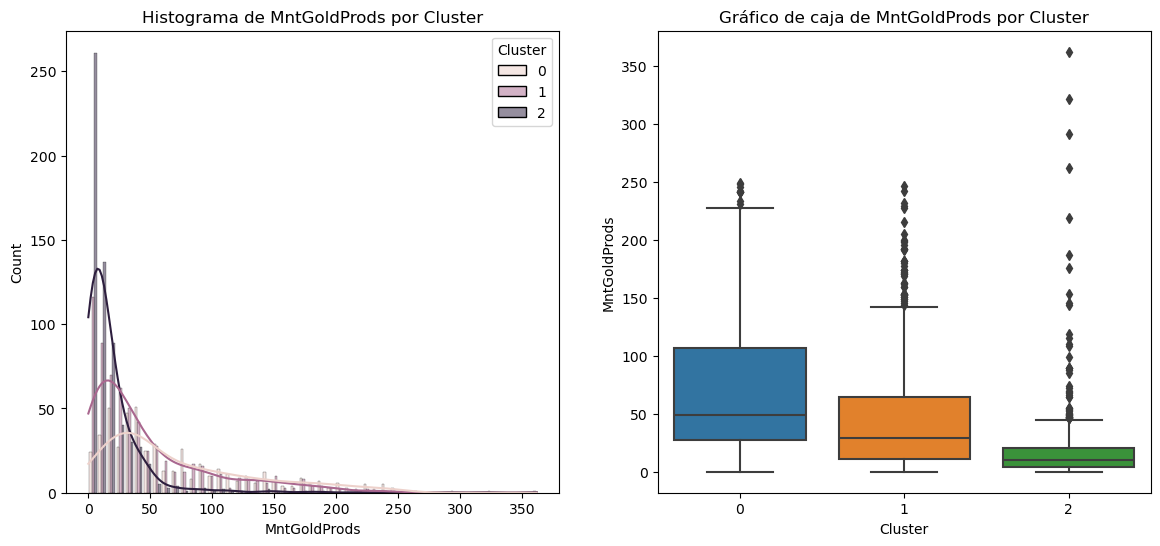

Estadísticos de resumen para MntGoldProds por Cluster:
         count   mean    std  min   25%   50%     75%    max
Cluster                                                     
0        500.0  71.21  60.16  0.0  27.0  49.0  107.00  249.0
1        655.0  46.59  49.60  0.0  11.0  29.0   64.00  246.0
2        634.0  18.82  32.87  0.0   4.0  10.0   20.75  362.0

ANOVA para MntGoldProds:
Estadístico F: 169.13
p-valor: 0.000
La variable MntGoldProds está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumDealsPurchases vs Cluster
****************************************


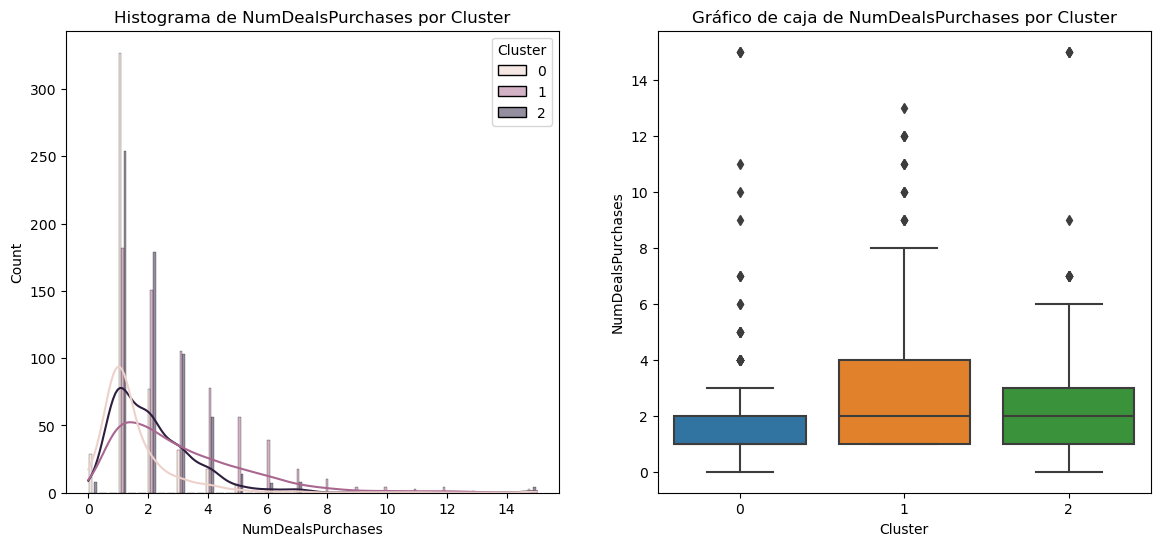

Estadísticos de resumen para NumDealsPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        500.0  1.57  1.63  0.0  1.0  1.0  2.0  15.0
1        655.0  3.05  2.15  1.0  1.0  2.0  4.0  13.0
2        634.0  2.18  1.67  0.0  1.0  2.0  3.0  15.0

ANOVA para NumDealsPurchases:
Estadístico F: 94.36
p-valor: 0.000
La variable NumDealsPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumWebPurchases vs Cluster
****************************************


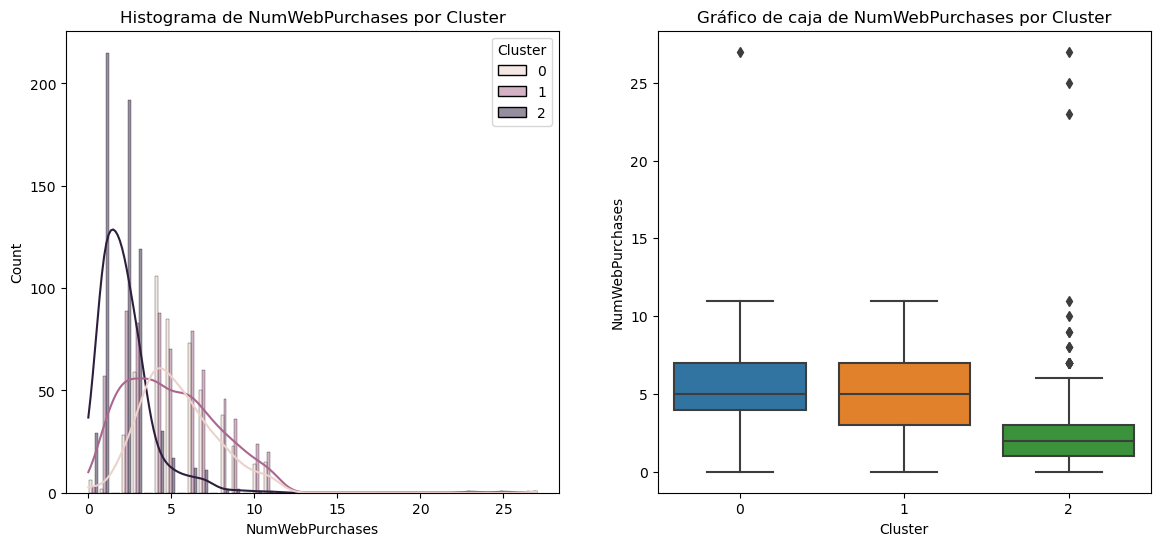

Estadísticos de resumen para NumWebPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        500.0  5.43  2.47  0.0  4.0  5.0  7.0  27.0
1        655.0  4.93  2.72  0.0  3.0  5.0  7.0  11.0
2        634.0  2.27  2.20  0.0  1.0  2.0  3.0  27.0

ANOVA para NumWebPurchases:
Estadístico F: 282.67
p-valor: 0.000
La variable NumWebPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumCatalogPurchases vs Cluster
****************************************


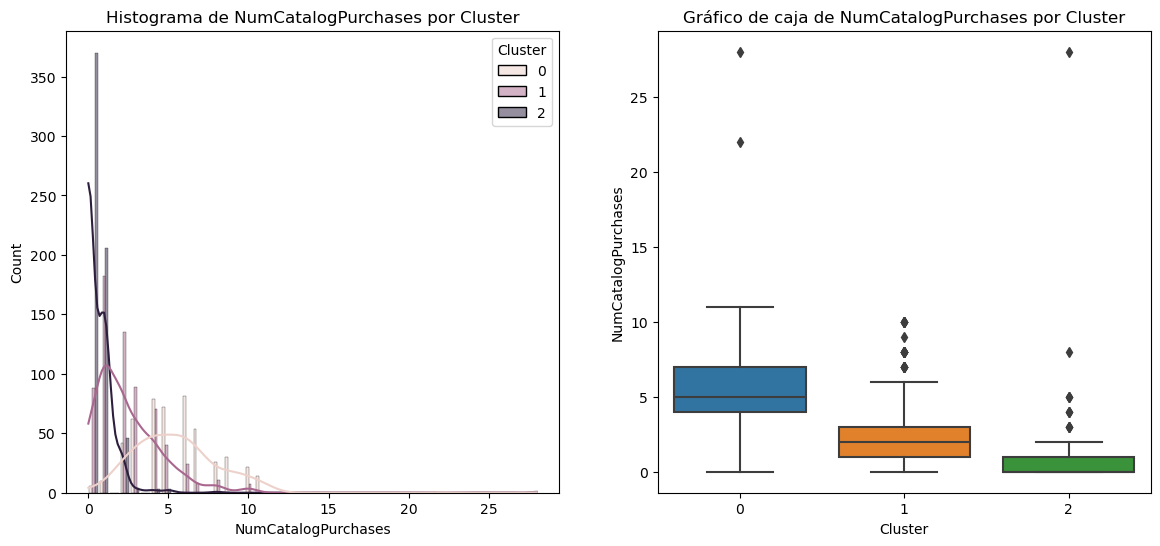

Estadísticos de resumen para NumCatalogPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        500.0  5.44  2.76  0.0  4.0  5.0  7.0  28.0
1        655.0  2.39  2.01  0.0  1.0  2.0  3.0  10.0
2        634.0  0.59  1.36  0.0  0.0  0.0  1.0  28.0

ANOVA para NumCatalogPurchases:
Estadístico F: 778.28
p-valor: 0.000
La variable NumCatalogPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumStorePurchases vs Cluster
****************************************


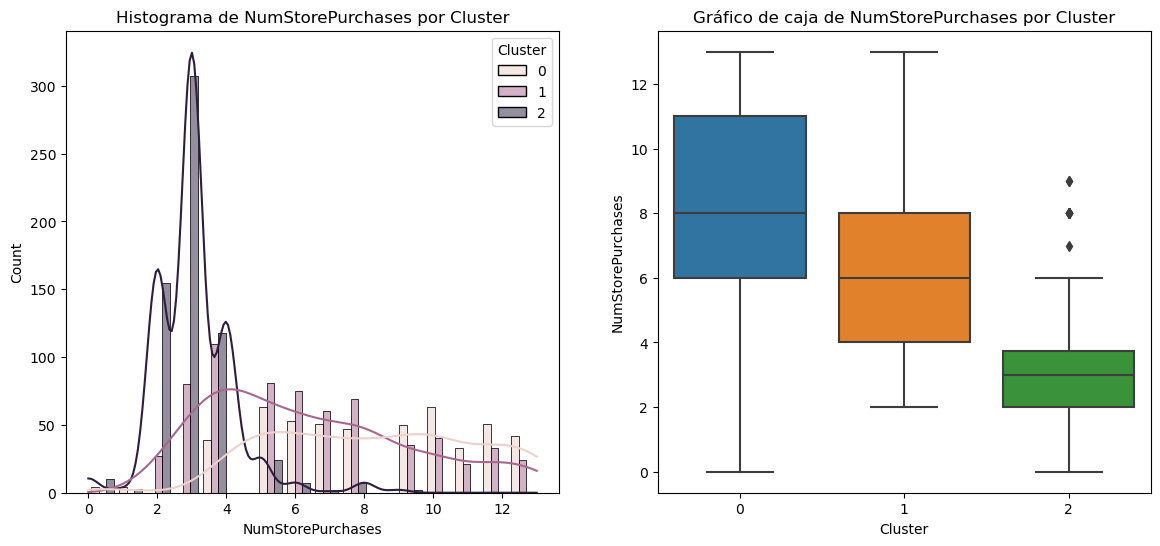

Estadísticos de resumen para NumStorePurchases por Cluster:
         count  mean   std  min  25%  50%    75%   max
Cluster                                               
0        500.0  8.25  2.95  0.0  6.0  8.0  11.00  13.0
1        655.0  6.44  2.96  2.0  4.0  6.0   8.00  13.0
2        634.0  3.07  1.12  0.0  2.0  3.0   3.75   9.0

ANOVA para NumStorePurchases:
Estadístico F: 656.28
p-valor: 0.000
La variable NumStorePurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumWebVisitsMonth vs Cluster
****************************************


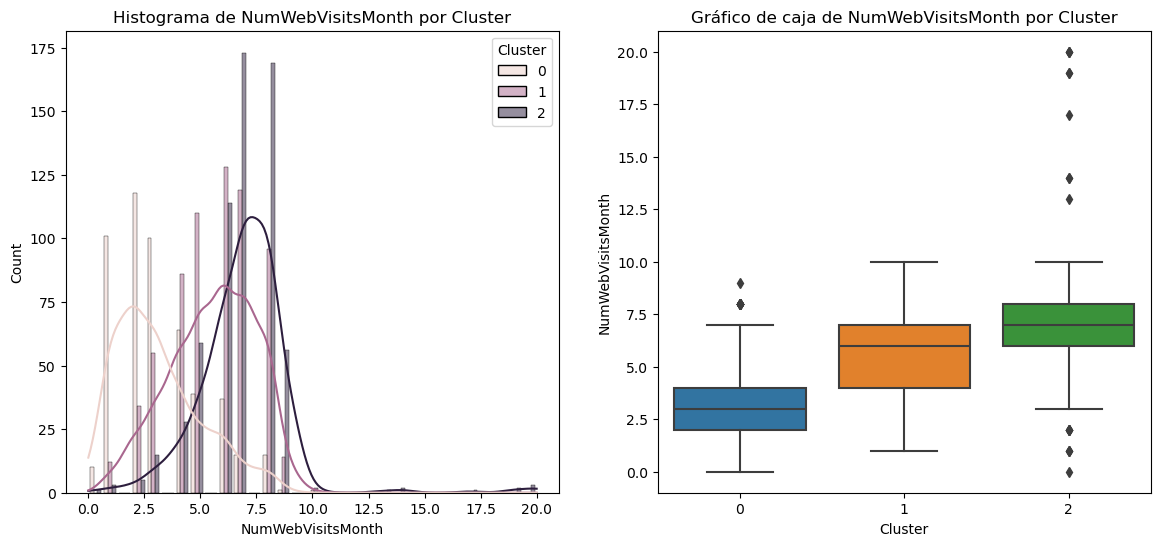

Estadísticos de resumen para NumWebVisitsMonth por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        500.0  3.09  1.91  0.0  2.0  3.0  4.0   9.0
1        655.0  5.56  1.88  1.0  4.0  6.0  7.0  10.0
2        634.0  6.93  2.01  0.0  6.0  7.0  8.0  20.0

ANOVA para NumWebVisitsMonth:
Estadístico F: 556.39
p-valor: 0.000
La variable NumWebVisitsMonth está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp3 vs Cluster
****************************************


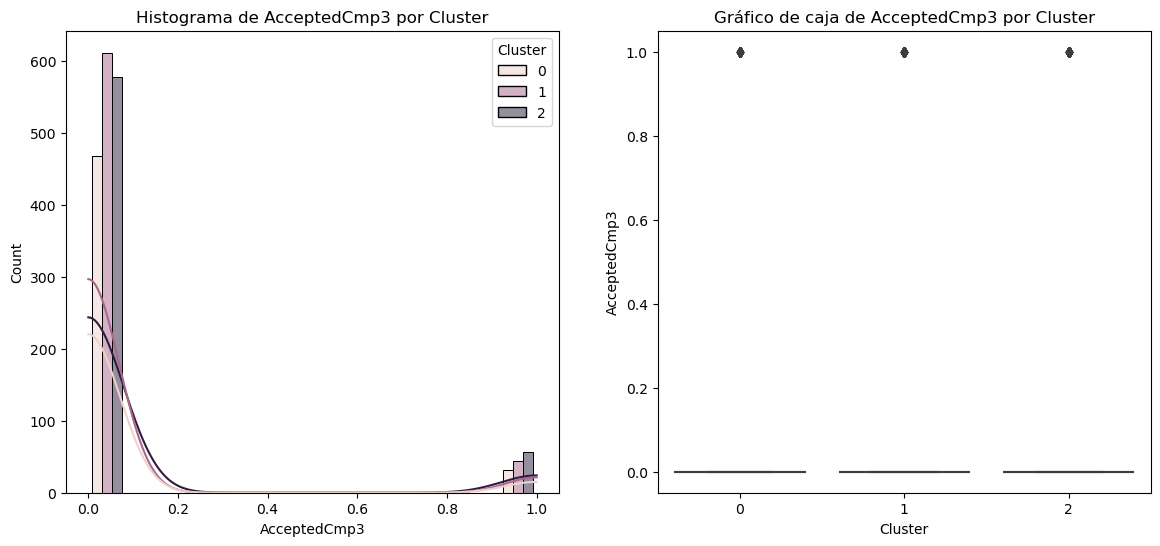

Estadísticos de resumen para AcceptedCmp3 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.06  0.24  0.0  0.0  0.0  0.0  1.0
1        655.0  0.07  0.25  0.0  0.0  0.0  0.0  1.0
2        634.0  0.09  0.29  0.0  0.0  0.0  0.0  1.0

ANOVA para AcceptedCmp3:
Estadístico F: 1.75
p-valor: 0.174
La variable AcceptedCmp3 no está significativamente asociada con Cluster (p >= 0.05).

Análisis de AcceptedCmp4 vs Cluster
****************************************


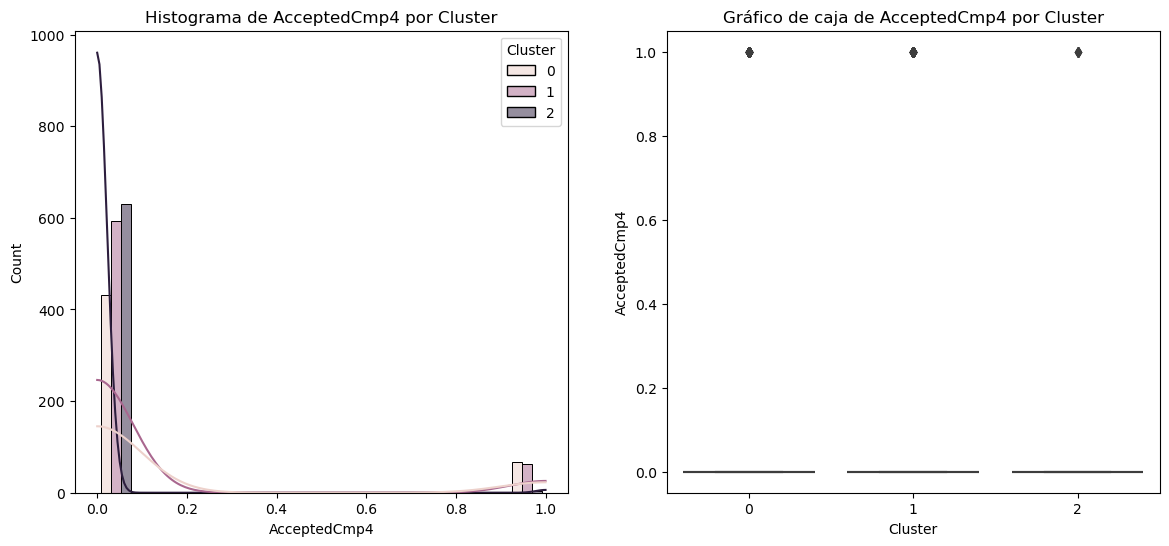

Estadísticos de resumen para AcceptedCmp4 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.14  0.34  0.0  0.0  0.0  0.0  1.0
1        655.0  0.09  0.29  0.0  0.0  0.0  0.0  1.0
2        634.0  0.01  0.08  0.0  0.0  0.0  0.0  1.0

ANOVA para AcceptedCmp4:
Estadístico F: 38.36
p-valor: 0.000
La variable AcceptedCmp4 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp5 vs Cluster
****************************************


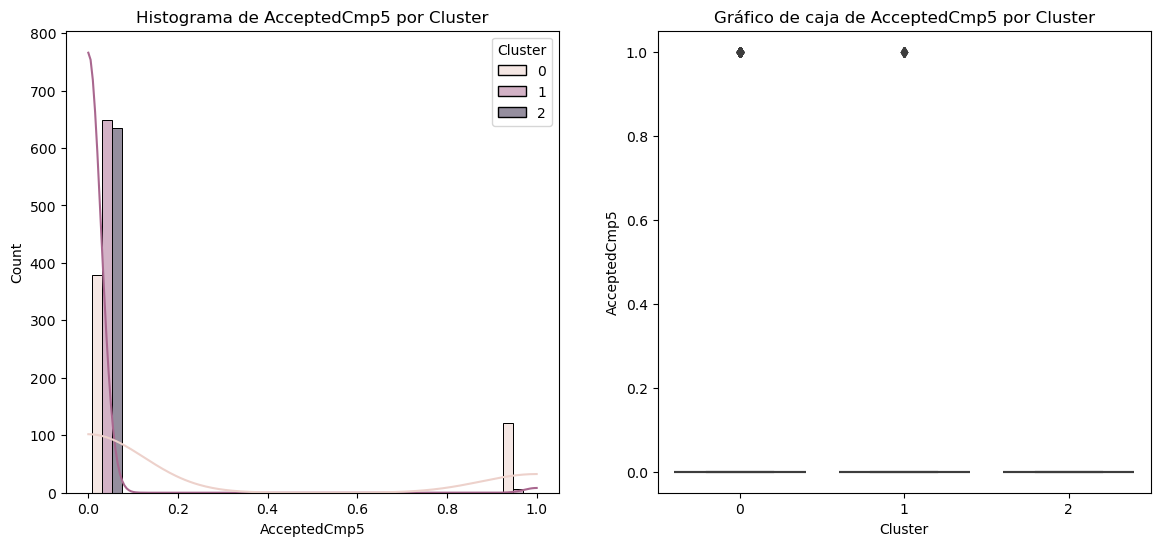

Estadísticos de resumen para AcceptedCmp5 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.24  0.43  0.0  0.0  0.0  0.0  1.0
1        655.0  0.01  0.10  0.0  0.0  0.0  0.0  1.0
2        634.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para AcceptedCmp5:
Estadístico F: 182.85
p-valor: 0.000
La variable AcceptedCmp5 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp1 vs Cluster
****************************************


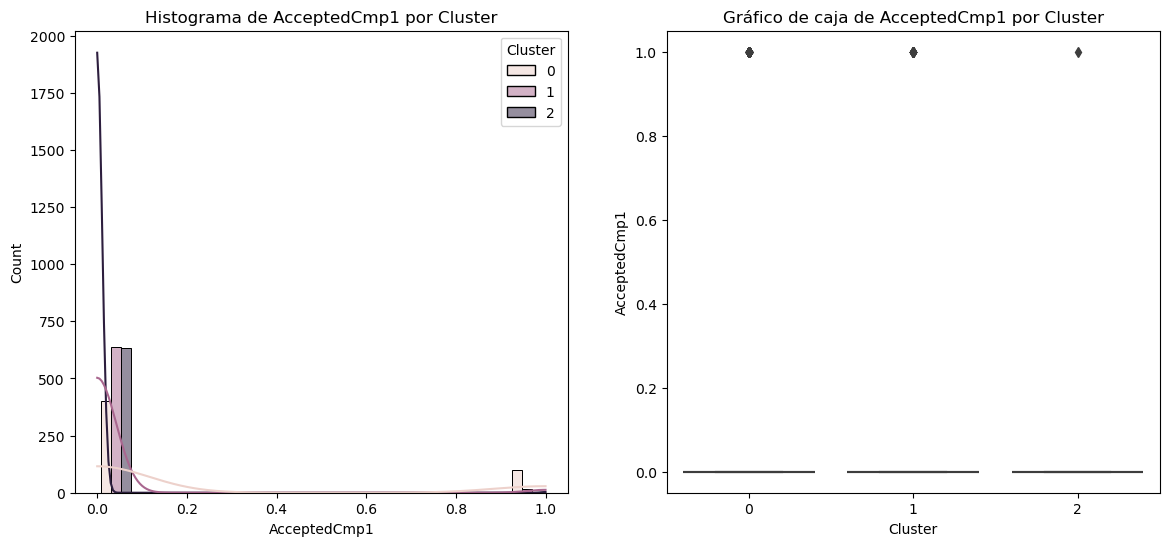

Estadísticos de resumen para AcceptedCmp1 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.20  0.40  0.0  0.0  0.0  0.0  1.0
1        655.0  0.02  0.15  0.0  0.0  0.0  0.0  1.0
2        634.0  0.00  0.04  0.0  0.0  0.0  0.0  1.0

ANOVA para AcceptedCmp1:
Estadístico F: 116.02
p-valor: 0.000
La variable AcceptedCmp1 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp2 vs Cluster
****************************************


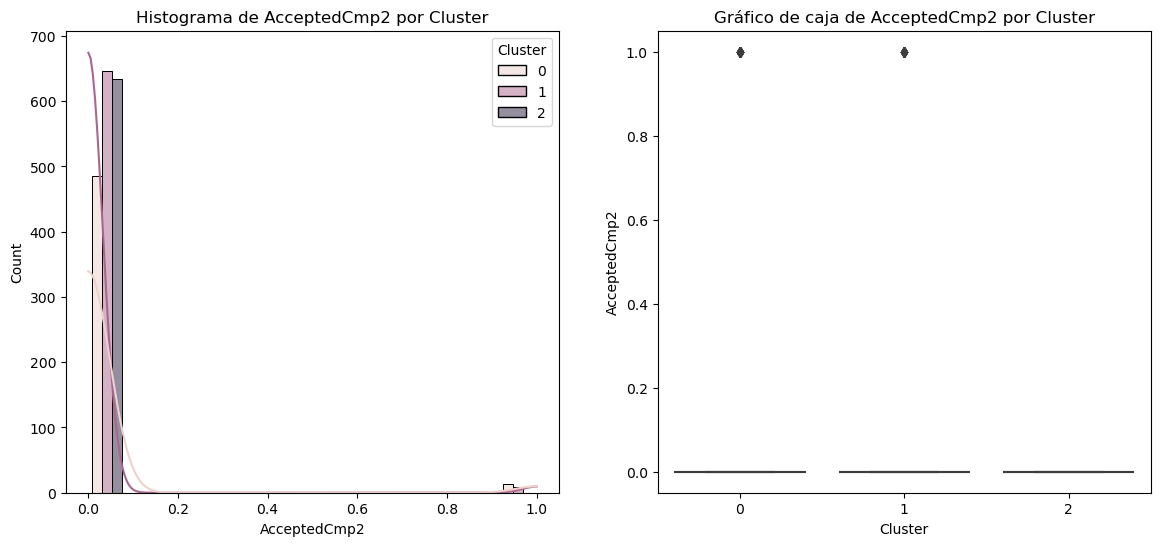

Estadísticos de resumen para AcceptedCmp2 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.03  0.17  0.0  0.0  0.0  0.0  1.0
1        655.0  0.01  0.12  0.0  0.0  0.0  0.0  1.0
2        634.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para AcceptedCmp2:
Estadístico F: 8.74
p-valor: 0.000
La variable AcceptedCmp2 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Complain vs Cluster
****************************************


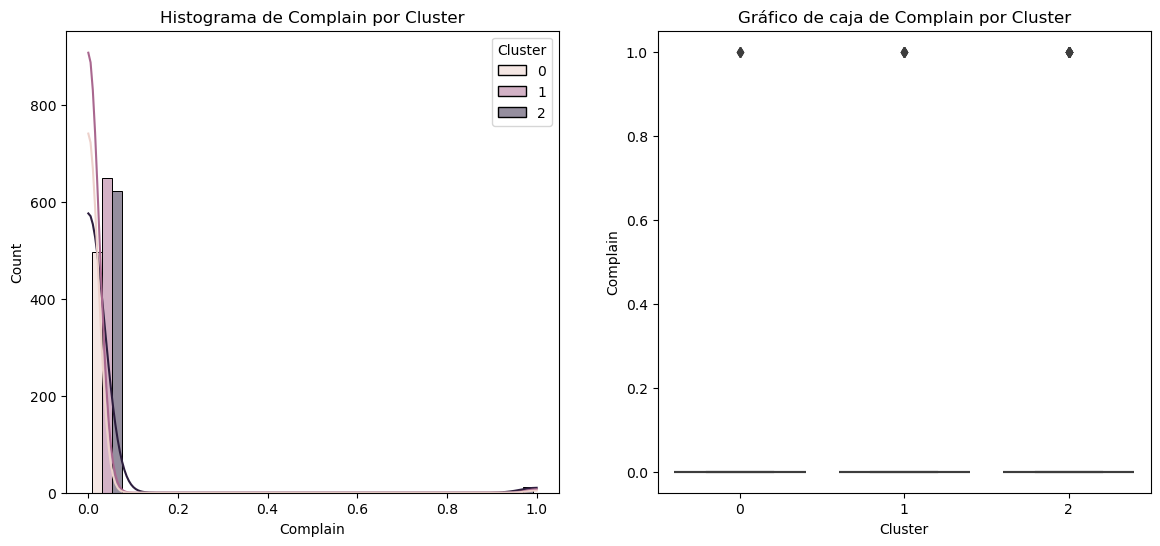

Estadísticos de resumen para Complain por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.01  0.08  0.0  0.0  0.0  0.0  1.0
1        655.0  0.01  0.09  0.0  0.0  0.0  0.0  1.0
2        634.0  0.02  0.13  0.0  0.0  0.0  0.0  1.0

ANOVA para Complain:
Estadístico F: 2.15
p-valor: 0.116
La variable Complain no está significativamente asociada con Cluster (p >= 0.05).

Análisis de Response vs Cluster
****************************************


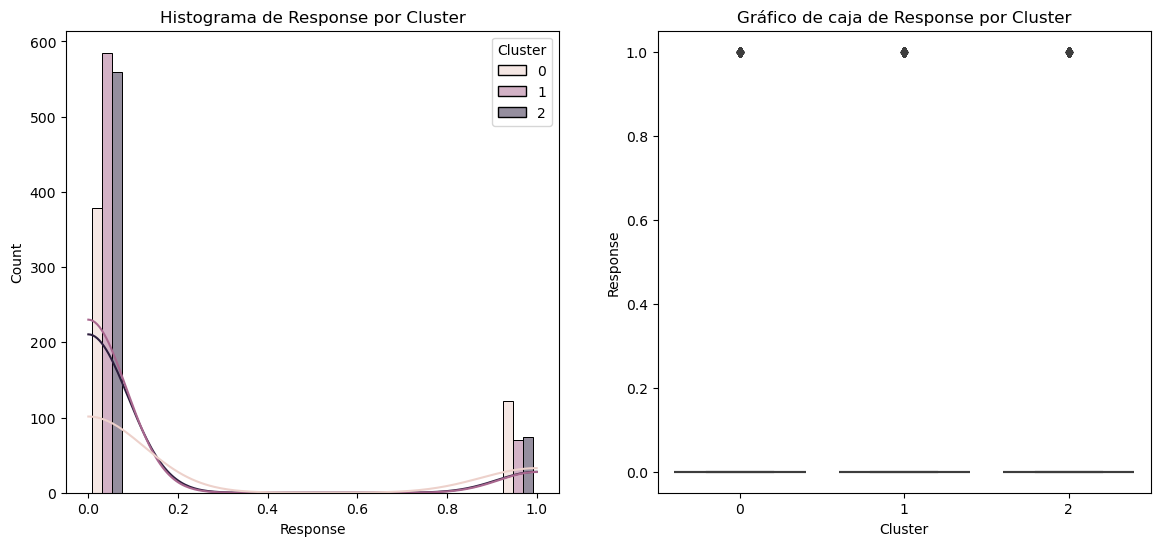

Estadísticos de resumen para Response por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.24  0.43  0.0  0.0  0.0  0.0  1.0
1        655.0  0.11  0.31  0.0  0.0  0.0  0.0  1.0
2        634.0  0.12  0.32  0.0  0.0  0.0  0.0  1.0

ANOVA para Response:
Estadístico F: 25.70
p-valor: 0.000
La variable Response está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de age vs Cluster
****************************************


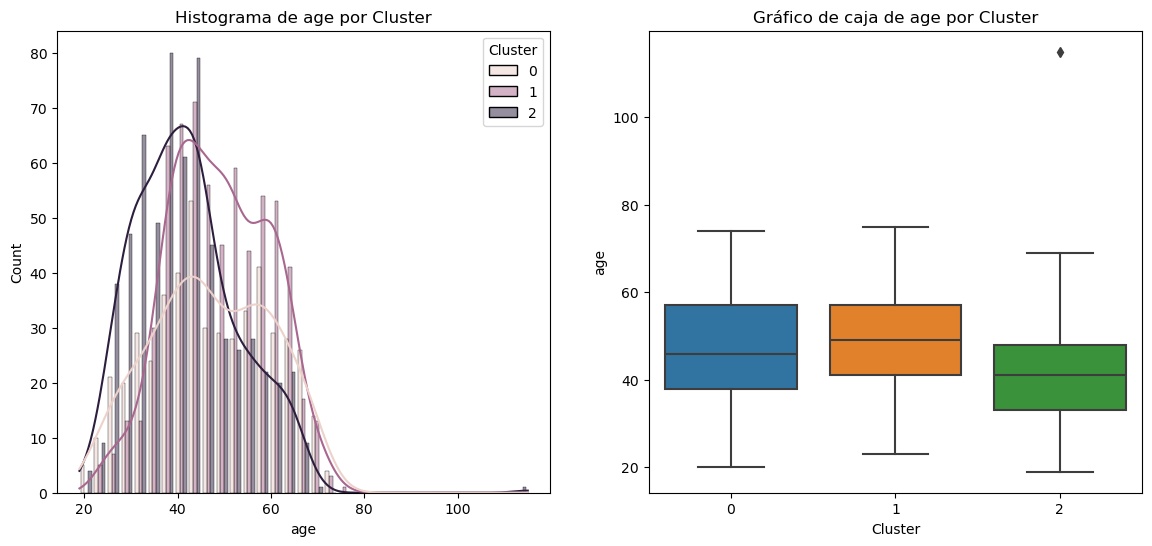

Estadísticos de resumen para age por Cluster:
         count   mean    std   min   25%   50%   75%    max
Cluster                                                    
0        500.0  47.28  12.75  20.0  38.0  46.0  57.0   74.0
1        655.0  48.94  10.52  23.0  41.0  49.0  57.0   75.0
2        634.0  41.87  11.14  19.0  33.0  41.0  48.0  115.0

ANOVA para age:
Estadístico F: 66.60
p-valor: 0.000
La variable age está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de customes_seniority vs Cluster
****************************************


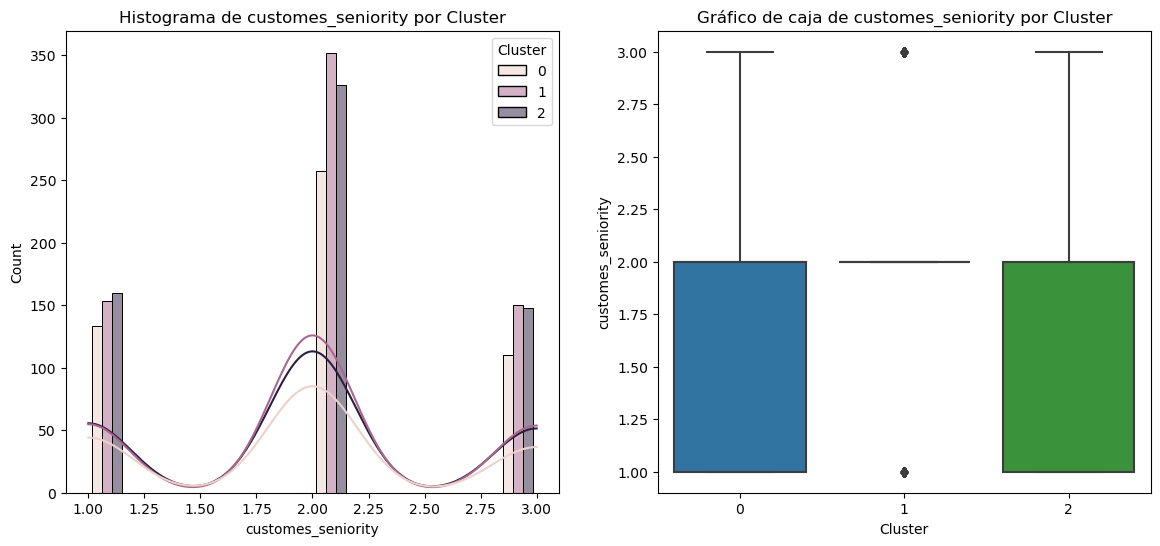

Estadísticos de resumen para customes_seniority por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  1.95  0.70  1.0  1.0  2.0  2.0  3.0
1        655.0  2.00  0.68  1.0  2.0  2.0  2.0  3.0
2        634.0  1.98  0.70  1.0  1.0  2.0  2.0  3.0

ANOVA para customes_seniority:
Estadístico F: 0.51
p-valor: 0.598
La variable customes_seniority no está significativamente asociada con Cluster (p >= 0.05).

Análisis de Household_members vs Cluster
****************************************


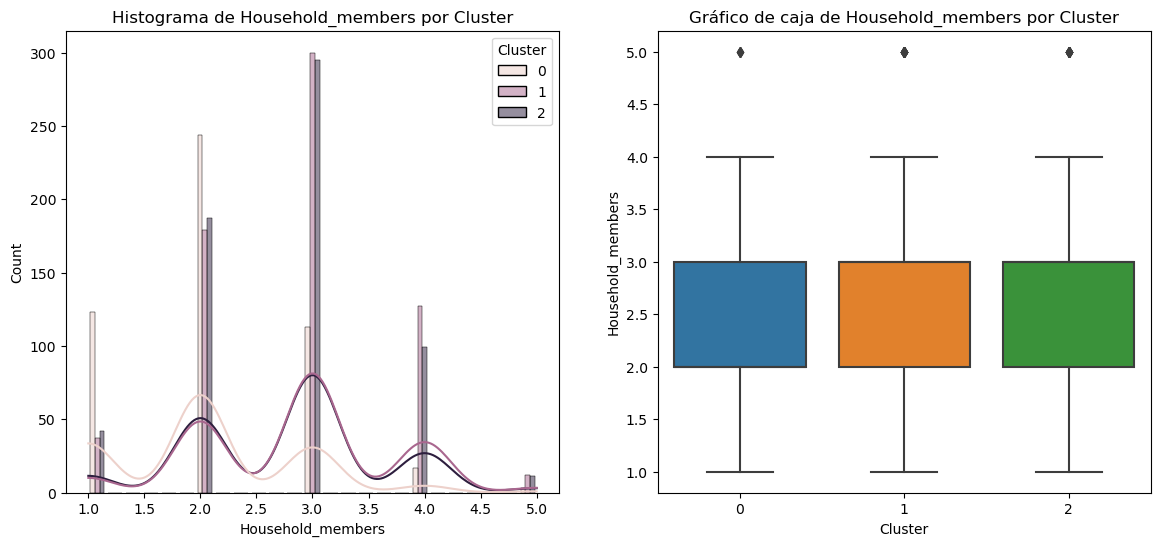

Estadísticos de resumen para Household_members por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  2.07  0.81  1.0  2.0  2.0  3.0  5.0
1        655.0  2.84  0.86  1.0  2.0  3.0  3.0  5.0
2        634.0  2.76  0.85  1.0  2.0  3.0  3.0  5.0

ANOVA para Household_members:
Estadístico F: 138.82
p-valor: 0.000
La variable Household_members está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_amount vs Cluster
****************************************


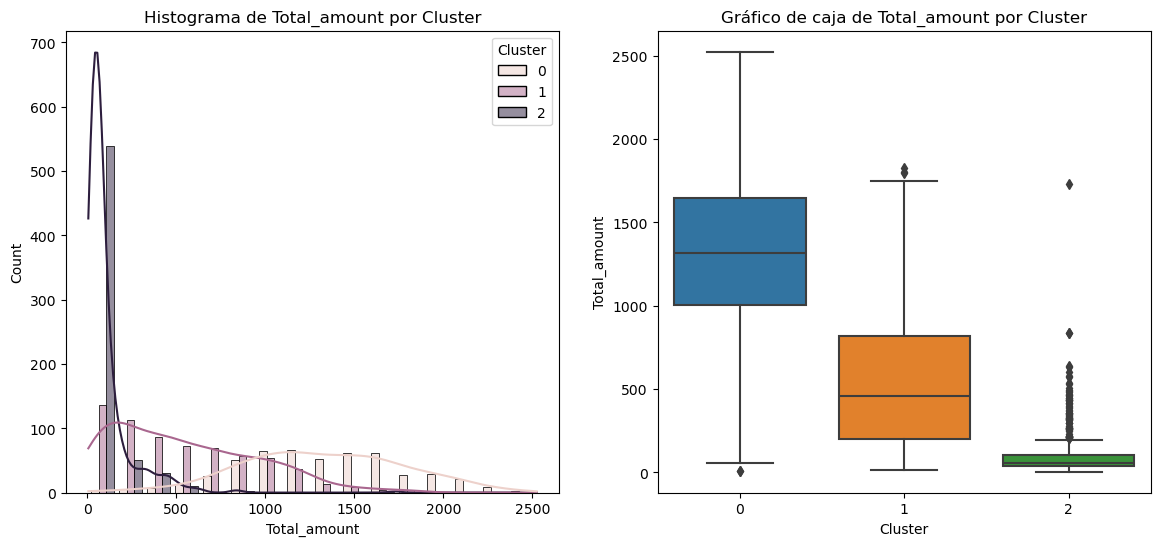

Estadísticos de resumen para Total_amount por Cluster:
         count     mean     std   min      25%     50%      75%     max
Cluster                                                                
0        500.0  1320.72  456.02   6.0  1001.75  1314.0  1645.50  2524.0
1        655.0   543.41  403.54  16.0   198.50   461.0   821.00  1826.0
2        634.0   101.35  133.02   5.0    36.00    58.0   102.75  1730.0

ANOVA para Total_amount:
Estadístico F: 1691.21
p-valor: 0.000
La variable Total_amount está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_purchase vs Cluster
****************************************


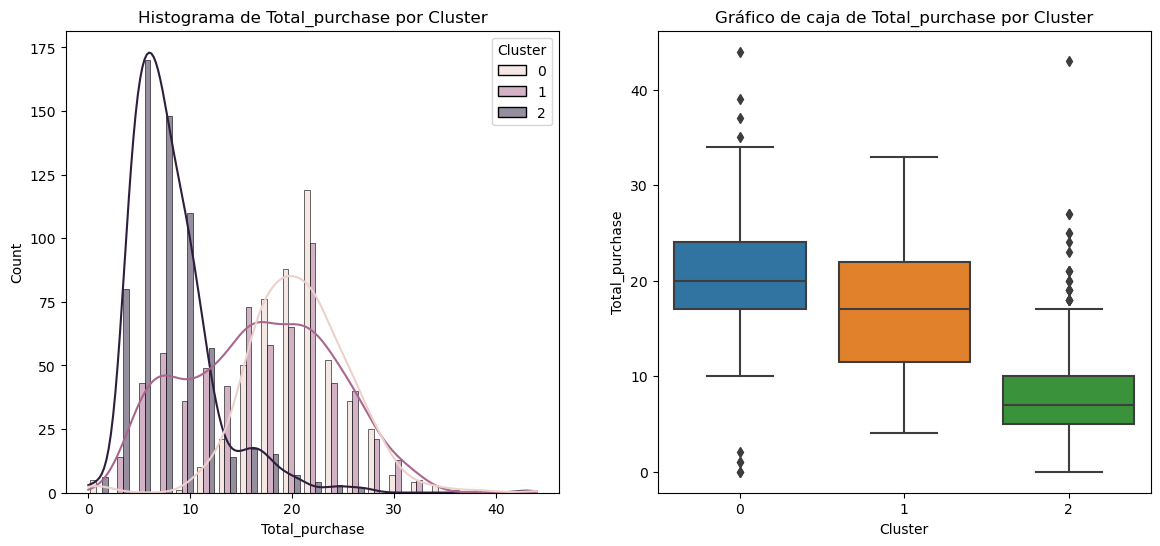

Estadísticos de resumen para Total_purchase por Cluster:
         count   mean   std  min   25%   50%   75%   max
Cluster                                                 
0        500.0  20.70  5.07  0.0  17.0  20.0  24.0  44.0
1        655.0  16.82  7.03  4.0  11.5  17.0  22.0  33.0
2        634.0   8.11  4.13  0.0   5.0   7.0  10.0  43.0

ANOVA para Total_purchase:
Estadístico F: 772.36
p-valor: 0.000
La variable Total_purchase está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_cmp vs Cluster
****************************************


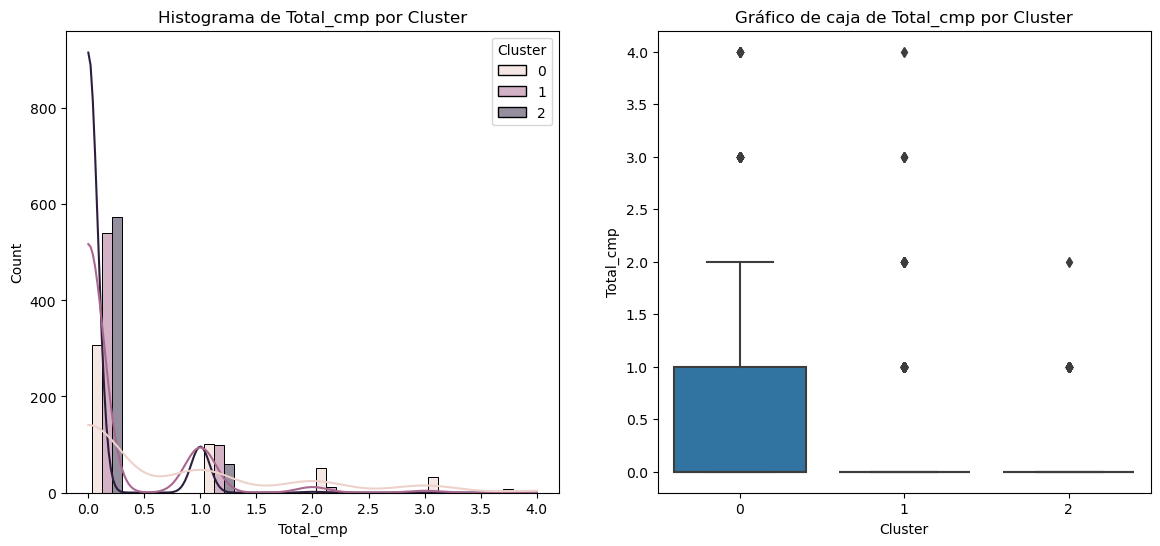

Estadísticos de resumen para Total_cmp por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        500.0  0.67  1.00  0.0  0.0  0.0  1.0  4.0
1        655.0  0.21  0.51  0.0  0.0  0.0  0.0  4.0
2        634.0  0.10  0.30  0.0  0.0  0.0  0.0  2.0

ANOVA para Total_cmp:
Estadístico F: 120.97
p-valor: 0.000
La variable Total_cmp está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Las features correlacionadas son: ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'age', 'Household_members', 'Total_amount', 'Total_purchase', 'Total_cmp']
Las features NO correlacionadas son: ['Recency', 'AcceptedCmp3', 'Complain', 'customes_senior

In [171]:
target = 'Cluster'

analisis_bivariable_numericas_categorica(train_set,target,features_num)

### Análisis con las variables categóricas

Análisis de Education vs Cluster
****************************************


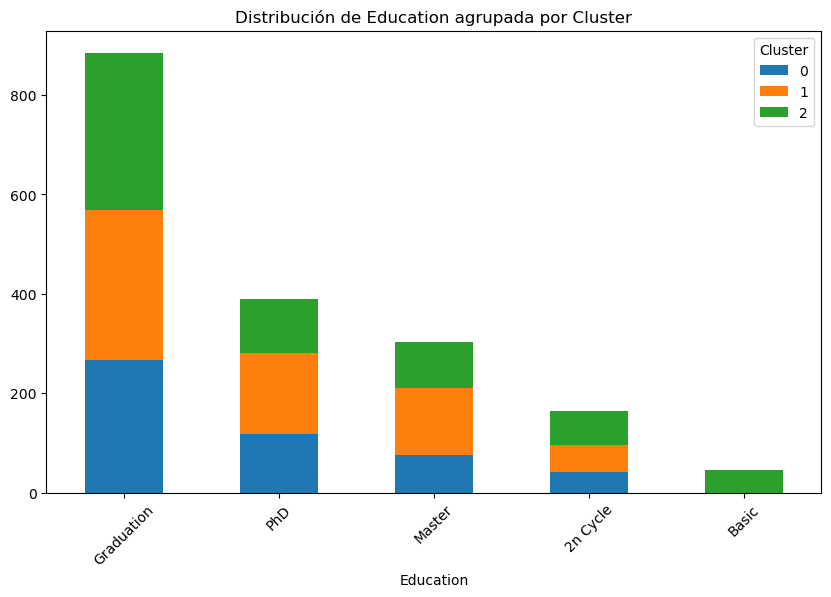

Tabla de contingencia de Education vs Cluster:
Cluster       0    1    2
Education                
Graduation  266  302  317
PhD         117  164  108
Master       76  134   94
2n Cycle     41   55   69
Basic         0    0   46

Tabla de porcentajes de Education respecto a Cluster:
Cluster        0          1          2
Education                             
Graduation  53.2  46.106870  50.000000
PhD         23.4  25.038168  17.034700
Master      15.2  20.458015  14.826498
2n Cycle     8.2   8.396947  10.883281
Basic        0.0   0.000000   7.255521

Tabla de frecuencias para Education:
            Frecuencia Absoluta  Frecuencia Relativa (%)
Education                                               
Graduation                  885                49.468977
PhD                         389                21.743991
Master                      304                16.992733
2n Cycle                    165                 9.223030
Basic                        46                 2.571269

Análi

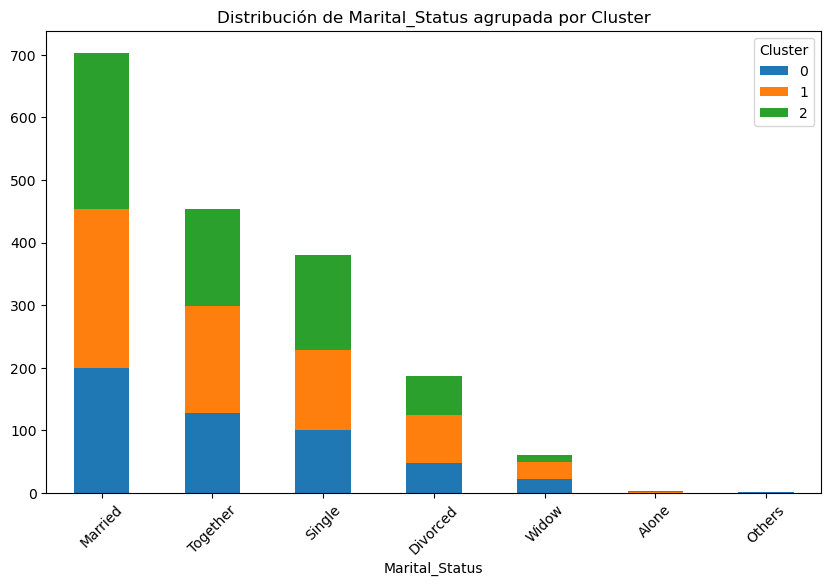

Tabla de contingencia de Marital_Status vs Cluster:
Cluster           0    1    2
Marital_Status               
Married         199  254  250
Together        128  170  155
Single          101  127  152
Divorced         48   76   63
Widow            23   26   12
Alone             0    1    2
Others            1    1    0

Tabla de porcentajes de Marital_Status respecto a Cluster:
Cluster            0          1          2
Marital_Status                            
Married         39.8  38.778626  39.432177
Together        25.6  25.954198  24.447950
Single          20.2  19.389313  23.974763
Divorced         9.6  11.603053   9.936909
Widow            4.6   3.969466   1.892744
Alone            0.0   0.152672   0.315457
Others           0.2   0.152672   0.000000

Tabla de frecuencias para Marital_Status:
                Frecuencia Absoluta  Frecuencia Relativa (%)
Marital_Status                                              
Married                         703                39.295696
Toget

In [172]:
analisis_bivariable_categoricas_categorica(train_set,target,features_cat)

### Otros análisis

In [173]:
cluster_0 = train_set.loc[train_set['Cluster']==0]
cluster_0.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Income,500.0,78260.53,11692.44,66294.0,71004.25,76635.5,82327.75,162397.0
Kidhome,500.0,0.08,0.28,0.0,0.00,0.0,0.00,2.0
Teenhome,500.0,0.33,0.50,0.0,0.00,0.0,1.00,2.0
Recency,500.0,49.32,30.07,0.0,23.00,51.0,75.00,99.0
MntWines,500.0,626.94,328.48,1.0,379.25,583.5,853.00,1493.0
MntFruits,500.0,58.69,48.36,0.0,22.00,43.0,86.75,194.0
MntMeatProducts,500.0,415.12,252.77,1.0,215.00,389.0,562.00,1622.0
MntFishProducts,500.0,86.50,66.13,0.0,33.00,69.0,133.00,258.0
MntSweetProducts,500.0,62.26,52.37,0.0,22.00,43.0,97.00,262.0
MntGoldProds,500.0,71.21,60.16,0.0,27.00,49.0,107.00,249.0


In [174]:
cluster_0['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.40
Together    0.26
Single      0.20
Divorced    0.10
Widow       0.05
Others      0.00
Alone       0.00
Name: proportion, dtype: float64

In [175]:
cluster_0['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.53
PhD           0.23
Master        0.15
2n Cycle      0.08
Basic         0.00
Name: proportion, dtype: float64

In [176]:
cluster_1 = train_set.loc[train_set['Cluster']==1]
cluster_1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Income,655.0,53927.94,7366.75,41437.0,47068.0,54178.0,60478.0,66000.0
Kidhome,655.0,0.38,0.53,0.0,0.0,0.0,1.0,2.0
Teenhome,655.0,0.81,0.49,0.0,1.0,1.0,1.0,2.0
Recency,655.0,48.99,29.10,0.0,24.0,50.0,74.0,99.0
MntWines,655.0,317.21,272.83,5.0,99.0,240.0,462.0,1459.0
MntFruits,655.0,20.84,33.78,0.0,1.0,7.0,22.5,199.0
MntMeatProducts,655.0,110.90,117.29,1.0,30.0,71.0,151.5,816.0
MntFishProducts,655.0,28.21,44.30,0.0,2.0,10.0,34.0,259.0
MntSweetProducts,655.0,19.65,31.05,0.0,0.0,7.0,23.0,188.0
MntGoldProds,655.0,46.59,49.60,0.0,11.0,29.0,64.0,246.0


In [177]:
cluster_1['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.39
Together    0.26
Single      0.19
Divorced    0.12
Widow       0.04
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [178]:
cluster_1['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.46
PhD           0.25
Master        0.20
2n Cycle      0.08
Basic         0.00
Name: proportion, dtype: float64

In [179]:
cluster_2 = train_set.loc[train_set['Cluster']==2]
cluster_2.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Income,634.0,28674.61,8670.72,1730.0,22804.00,30279.0,35860.00,41275.0
Kidhome,634.0,0.80,0.48,0.0,1.00,1.0,1.00,2.0
Teenhome,634.0,0.32,0.49,0.0,0.00,0.0,1.00,2.0
Recency,634.0,48.93,28.05,0.0,25.00,49.0,74.00,99.0
MntWines,634.0,33.56,50.46,0.0,6.00,15.0,36.75,424.0
MntFruits,634.0,6.12,12.74,0.0,1.00,3.0,6.00,151.0
MntMeatProducts,634.0,27.26,74.96,0.0,7.25,14.0,25.00,1725.0
MntFishProducts,634.0,9.07,18.67,0.0,2.00,4.0,11.00,208.0
MntSweetProducts,634.0,6.52,15.67,0.0,1.00,3.0,7.00,263.0
MntGoldProds,634.0,18.82,32.87,0.0,4.00,10.0,20.75,362.0


In [180]:
cluster_2['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.39
Together    0.24
Single      0.24
Divorced    0.10
Widow       0.02
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [181]:
cluster_2['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.50
PhD           0.17
Master        0.15
2n Cycle      0.11
Basic         0.07
Name: proportion, dtype: float64

In [182]:
cluster_3 = train_set.loc[train_set['Cluster']==3]
cluster_3.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Income,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFruits,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntGoldProds,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
cluster_3['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Alone      NaN
Divorced   NaN
Married    NaN
Others     NaN
Single     NaN
Together   NaN
Widow      NaN
Name: proportion, dtype: float64

In [184]:
cluster_3['Education'].value_counts(normalize=True).round(2)

Education
2n Cycle     NaN
Basic        NaN
Graduation   NaN
Master       NaN
PhD          NaN
Name: proportion, dtype: float64

for name in cluster_name:

In [185]:
cluster_name = [cluster_0,cluster_1,cluster_2]
dicc={}
for i,cluster in enumerate(cluster_name):
    print(i)
    print(cluster)
    temp = cluster.describe().T['50%'] 
    dicc[f'cluster_{i}']=temp
cluster_df = pd.DataFrame(dicc)

0
       Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
ID                                                                     
3011  Graduation        Married  69139.0        0         1       23   
535   Graduation       Divorced  81361.0        0         0       18   
5536  Graduation       Together  87771.0        0         1       61   
6072      Master         Single  75345.0        0         0       16   
3389  Graduation        Married  69016.0        0         1       61   
...          ...            ...      ...      ...       ...      ...   
158          PhD       Together  71604.0        0         0        3   
1772         PhD        Married  79174.0        0         0        2   
4679      Master        Married  78710.0        0         1       42   
2894  Graduation         Single  72903.0        0         0       74   
6905  Graduation       Together  80685.0        0         0       55   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  

In [191]:
grafico_mnt = cluster_df.loc[cluster_df.index.str.contains('Mnt')]
grafico_mnt

,cluster_0,cluster_1,cluster_2
MntWines,583.5,240.0,15.0
MntFruits,43.0,7.0,3.0
MntMeatProducts,389.0,71.0,14.0
MntFishProducts,69.0,10.0,4.0
MntSweetProducts,43.0,7.0,3.0
MntGoldProds,49.0,29.0,10.0


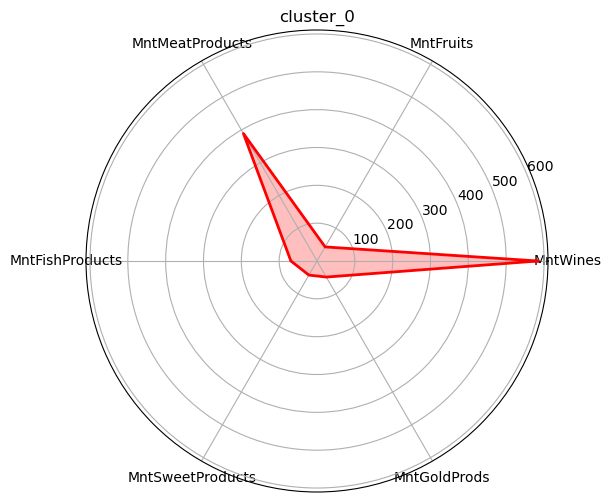

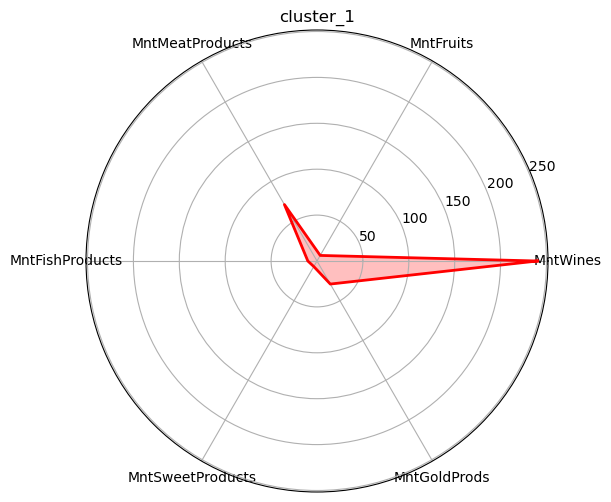

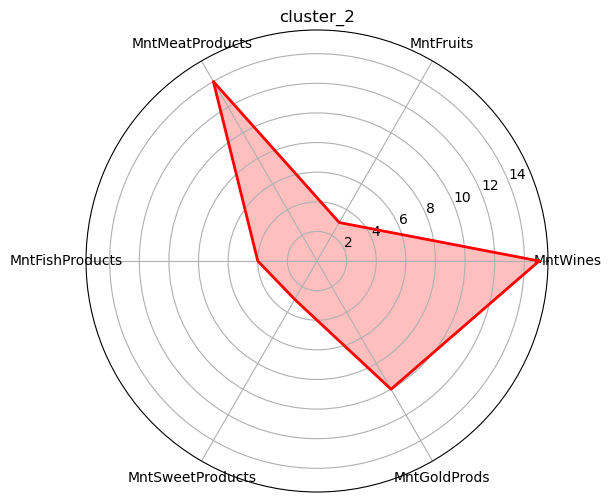

In [187]:
for elemento in grafico_mnt:
   stats= grafico_mnt[elemento].values.tolist()
   etiquetas = grafico_mnt.index.tolist()
   titulo = elemento
   crear_grafico_radar(stats,etiquetas, titulo)
   

In [200]:
stats_list = []
leyenda_multi = []
for elemento in grafico_mnt:
   temp_stats= grafico_mnt[elemento].values.tolist()
   temp_label = elemento
   stats_list.append(temp_stats)
   leyenda_multi.append(elemento)

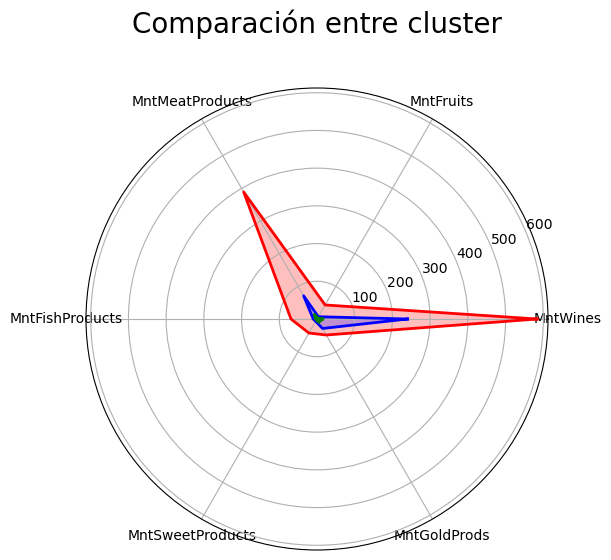

In [203]:
etiquetas_multi = grafico_mnt.index.to_list()
colores = ['red','blue', 'green']

crear_grafico_radar_multiples(stats_list,etiquetas_multi,colores,'Comparación entre cluster', leyenda_multi)

In [202]:
def crear_grafico_radar_multiples(stats_list, etiquetas, colores, titulo, leyenda):
    """
    Crea y muestra un gráfico de radar con múltiples conjuntos de estadísticas.
    
    Parámetros:
    - stats_list: Lista de listas de estadísticas para cada conjunto de datos.
    - etiquetas: Lista de etiquetas para cada eje del gráfico de radar.
    - colores: Lista de colores para cada conjunto de datos.
    - titulo: Título del gráfico.
    """
    # Número de variables que estamos graficando.
    num_vars = len(etiquetas)
    
    # Dividir el círculo y calcular los ángulos necesarios para representar cada eje.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Completar el círculo
    
    # Iniciar el gráfico de radar.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Graficar cada conjunto de estadísticas en el gráfico de radar.
    for stats, color in zip(stats_list, colores):
        stats += stats[:1]  # Completar el círculo
        ax.fill(angles, stats, color=color, alpha=0.25)
        ax.plot(angles, stats, color=color, linewidth=2)
    
    # Establecer las etiquetas para los ejes.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(etiquetas)
    
    # Añadir un título
    plt.title(titulo, size=20, color='black', y=1.1)
    
    # Mostrar el gráfico.
    plt.show()

